In [46]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Análisis de regresión lineal y múltiple sobre calidad de vino
Este notebook sigue la estructura y buenas prácticas de la Ayudantía 4, aplicando regresión lineal simple y múltiple, visualizaciones, métricas y análisis de residuos sobre el dataset de vinos.

## 1. Carga y limpieza de datos
Se carga el archivo CSV y se realiza una limpieza básica para asegurar que los datos sean válidos para el análisis.

In [47]:
# Cargar datos y mostrar primeras filas
df = pd.read_csv('wine_Tarea4.csv').drop(columns=['Id']).dropna()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [48]:
## 2. Regresión lineal simple: alcohol vs calidad
###Se ajusta un modelo de regresión lineal simple para predecir la calidad del vino usando solo el contenido de alcohol.

In [49]:
# Modelo simple
x = df[['alcohol']]
y = df['quality']
lr = LinearRegression()
lr.fit(x, y)
x_test = np.linspace(x['alcohol'].min(), x['alcohol'].max(), 100).reshape(-1, 1)
y_pred = lr.predict(x_test)
print(f"Ecuación: y = {lr.intercept_:.2f} + {lr.coef_[0]:.2f}*x")

Ecuación: y = 1.89 + 0.36*x


c:\Users\aroja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


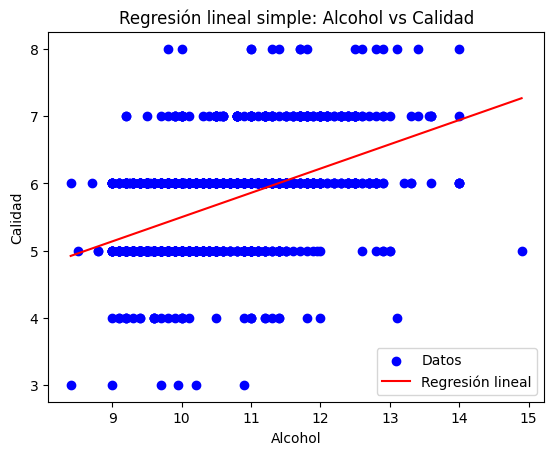

In [50]:
# Visualización del ajuste simple
plt.scatter(x, y, color='blue', label='Datos')
plt.plot(x_test, y_pred, color='red', label='Regresión lineal')
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.legend()
plt.title('Regresión lineal simple: Alcohol vs Calidad')
plt.show()

> **Nota:** La variable 'calidad' es discreta (por ejemplo, valores enteros de 3 a 8), por lo que los puntos del gráfico se agrupan en líneas horizontales. Esto es normal y refleja la naturaleza categórica de la variable objetivo en este tipo de datasets.

## 3. Regresión lineal múltiple
Ahora ajustamos un modelo de regresión lineal múltiple usando todas las variables predictoras para estimar la calidad del vino.

In [51]:
# Modelo múltiple
X = df.drop(columns=['quality'])
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
y_pred_multi = lr_multi.predict(X_test)
print(f"MSE modelo múltiple: {mean_squared_error(y_test, y_pred_multi):.2f}")
print(f"R2 modelo múltiple: {r2_score(y_test, y_pred_multi):.3f}")

MSE modelo múltiple: 0.38
R2 modelo múltiple: 0.317


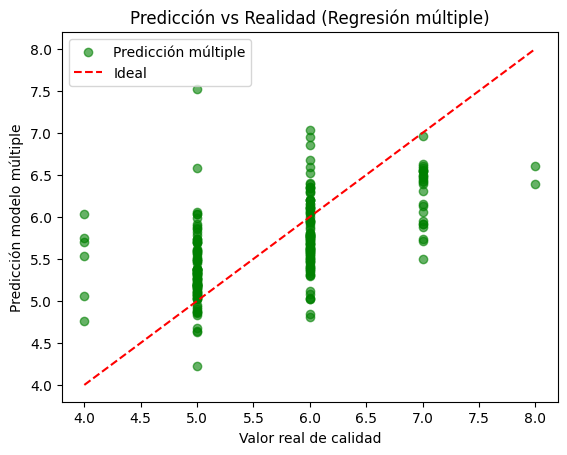

In [52]:
# Visualización: Predicción vs Realidad (Regresión múltiple)
plt.scatter(y_test, y_pred_multi, color='green', alpha=0.6, label='Predicción múltiple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')
plt.xlabel('Valor real de calidad')
plt.ylabel('Predicción modelo múltiple')
plt.title('Predicción vs Realidad (Regresión múltiple)')
plt.legend()
plt.show()

## 4. Análisis de residuos del modelo múltiple
Para validar la calidad del ajuste, analizamos los residuos (errores) del modelo múltiple. Esto permite verificar supuestos de independencia, homocedasticidad y normalidad.

In [53]:
# Cálculo de residuos
residuos = y_test - y_pred_multi

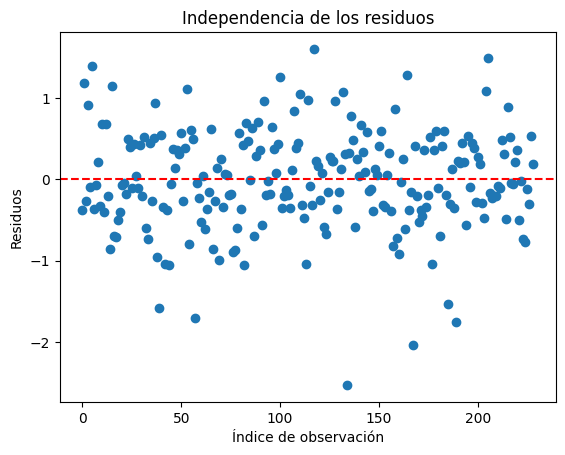

In [54]:
# Independencia de los residuos
plt.scatter(range(len(residuos)), residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Índice de observación')
plt.ylabel('Residuos')
plt.title('Independencia de los residuos')
plt.show()

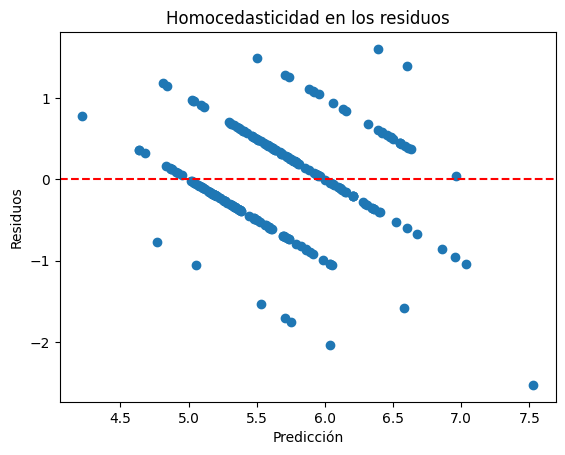

In [55]:
# Homocedasticidad (residuos vs predicción)
plt.scatter(y_pred_multi, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicción')
plt.ylabel('Residuos')
plt.title('Homocedasticidad en los residuos')
plt.show()

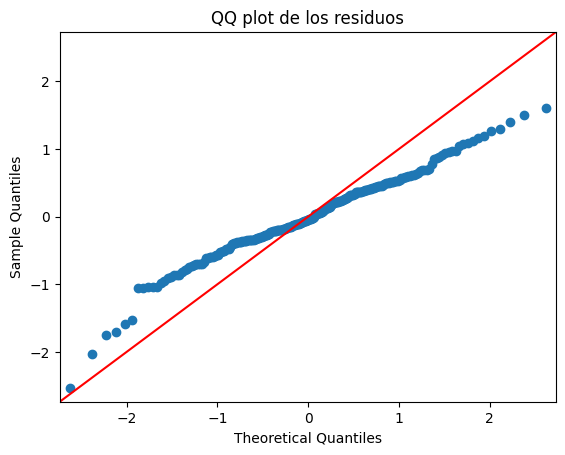

In [56]:
# Normalidad de los residuos
sm.qqplot(residuos, line='45')
plt.title('QQ plot de los residuos')
plt.show()

**Interpretación de los residuos:**
- Si los residuos se distribuyen aleatoriamente alrededor de cero (sin patrones), el modelo cumple el supuesto de independencia.
- Si la dispersión de los residuos es constante para todos los valores predichos, hay homocedasticidad.
- Si el QQ plot muestra los residuos alineados con la diagonal, los errores son aproximadamente normales.
Si alguno de estos supuestos no se cumple, se recomienda revisar el modelo o aplicar transformaciones.

## 5. Comparación de modelos y conclusiones
A continuación se comparan las métricas de regresión simple y múltiple para evaluar cuál modelo se ajusta mejor a los datos.

In [57]:
# Métricas del modelo simple
y_pred_simple = lr.predict(x)
mse_simple = mean_squared_error(y, y_pred_simple)
r2_simple = r2_score(y, y_pred_simple)
print(f"MSE modelo simple: {mse_simple:.2f}")
print(f"R2 modelo simple: {r2_simple:.3f}")

MSE modelo simple: 0.50
R2 modelo simple: 0.235


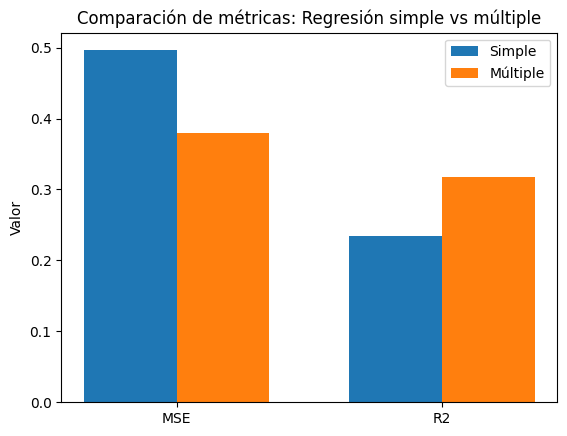

In [58]:
# Comparación visual de métricas
labels = ['MSE', 'R2']
simple_metrics = [mse_simple, r2_simple]
multi_metrics = [mean_squared_error(y_test, y_pred_multi), r2_score(y_test, y_pred_multi)]
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, simple_metrics, width, label='Simple')
rects2 = ax.bar(x + width/2, multi_metrics, width, label='Múltiple')
ax.set_ylabel('Valor')
ax.set_title('Comparación de métricas: Regresión simple vs múltiple')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

**Conclusión:**
- Compara los valores de MSE y R² entre ambos modelos para decidir cuál se ajusta mejor a los datos.
- Si el modelo múltiple mejora significativamente las métricas respecto al simple, entonces la inclusión de más variables es beneficiosa.
- Si no, el modelo simple puede ser suficiente para predecir la calidad del vino.

## 6. Importancia de variables en el modelo múltiple
Analizamos los coeficientes del modelo múltiple para identificar qué variables tienen mayor impacto en la predicción de la calidad del vino.

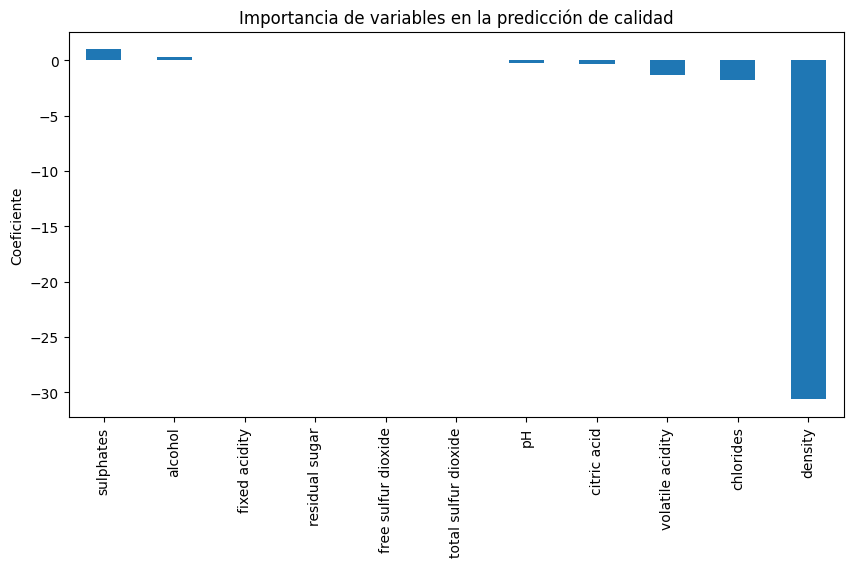

In [59]:
# Coeficientes del modelo múltiple
importances = pd.Series(lr_multi.coef_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Importancia de variables en la predicción de calidad')
plt.ylabel('Coeficiente')
plt.show()

**Interpretación:**
- Las variables con coeficientes más altos (en valor absoluto) tienen mayor influencia en la predicción de la calidad.
- Un coeficiente positivo indica que al aumentar esa variable, la calidad tiende a aumentar; uno negativo indica lo contrario.
- Es importante revisar la significancia estadística de cada variable para evitar interpretar coeficientes no relevantes.

## 7. Análisis de multicolinealidad (VIF)
La multicolinealidad ocurre cuando dos o más variables predictoras están altamente correlacionadas, lo que puede afectar la estabilidad de los coeficientes. El VIF (Variance Inflation Factor) permite detectar este problema.

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = sm.add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif

,Variable,VIF
0,const,1.709667e+06
1,fixed acidity,7.780540e+00
2,volatile acidity,1.778704e+00
3,citric acid,3.222840e+00
4,residual sugar,1.743237e+00
5,chlorides,1.538470e+00
6,free sulfur dioxide,1.906045e+00
7,total sulfur dioxide,2.103748e+00
8,density,6.595115e+00
9,pH,3.393307e+00


**Interpretación:**
- Un VIF mayor a 5 o 10 indica posible multicolinealidad.
- Si se detectan variables con VIF alto, se recomienda eliminarlas o combinar variables para mejorar la estabilidad del modelo.

## 8. Selección de variables significativas
Para mejorar el modelo, se pueden eliminar variables con VIF alto o coeficientes no significativos. Usamos statsmodels para obtener los p-valores y ajustar el modelo solo con las variables relevantes.

In [61]:
# Ajuste con statsmodels para obtener p-valores
X_sm = sm.add_constant(X)
modelo_sm = sm.OLS(y, X_sm).fit()
display(modelo_sm.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     61.49
Date:                Sun, 05 Oct 2025   Prob (F-statistic):          4.26e-107
Time:                        20:33:16   Log-Likelihood:                -1106.7
No. Observations:                1143   AIC:                             2237.
Df Residuals:                    1131   BIC:                             2298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.5495     24.773      0.870      0.385     -27.057      70.156
fixed acidity            0.0230      0.030      0.759      0.448      -0.036       0.082
volatile acidity        -1.1291      0.141     -8.023      0.000      -1.405      -0.853
citric acid             -0.1319      0.173     -0.762      0.446      -0.471       0.208
residual sugar           0.0135      0.018      0.732      0.464      -0.023       0.050
chlorides               -1.7082      0.497     -3.434      0.001      -2.684      -0.732
free sulfur dioxide      0.0024      0.003      0.928      0.354      -0.003       0.007
total sulfur dioxide    -0.0028      0.001     -3.321      0.001      -0.004      -0.001
density                -17.4493     25.286     -0.690      0.490     -67.062      32.163
pH                      -0.4082      0.223     -1.832      0.067      -0.845       0.029
sulphates                0.8752      0.134      6.555      0.000       0.613       1.137
alcohol                  0.2801      0.031      8.963      0.000       0.219       0.341
==============================================================================
Omnibus:                       19.010   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.205
Skew:                          -0.141   Prob(JB):                     4.55e-07
Kurtosis:                       3.731   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretación:**
- Las variables con p-valor menor a 0.05 se consideran estadísticamente significativas.
- Se recomienda eliminar variables con p-valor alto y volver a ajustar el modelo para obtener estimaciones más confiables.

## 9. Resumen final y recomendaciones
Este análisis incluyó: carga y limpieza de datos, regresión simple y múltiple, visualizaciones, métricas, análisis de residuos, importancia de variables, multicolinealidad y selección de variables significativas.
**Recomendaciones:**
- Validar los supuestos del modelo antes de interpretar resultados.
- Preferir modelos con menor MSE y mayor R², pero también con variables significativas y sin multicolinealidad.
- Si el modelo no cumple los supuestos, considerar transformaciones o modelos alternativos.
- Documentar cada paso y justificar las decisiones tomadas en el análisis.